In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
gender_sub=pd.read_csv('gender_submission.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
gender_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


<AxesSubplot:ylabel='Frequency'>

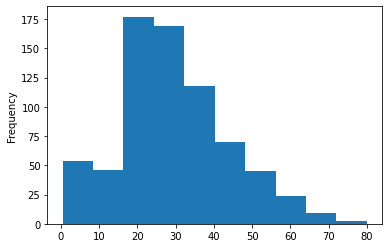

In [6]:
train.Age.plot.hist()

In [7]:
null_values=[feature for feature in train.columns if train[feature].isnull().sum()>1]
for feature in null_values:
    print(f'{feature} has {train[feature].isnull().sum()} null values')

Age has 177 null values
Cabin has 687 null values
Embarked has 2 null values


In [8]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

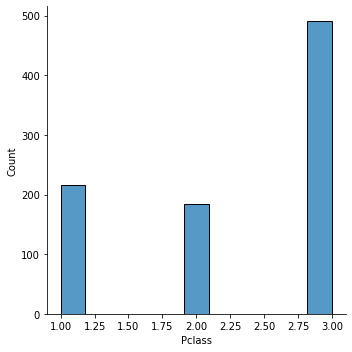

In [9]:
sns.displot(train.Pclass)

In [10]:
train.Name.value_counts()

Sage, Mr. George John Jr                                               1
Pears, Mrs. Thomas (Edith Wearne)                                      1
Markun, Mr. Johann                                                     1
Radeff, Mr. Alexander                                                  1
Kimball, Mr. Edwin Nelson Jr                                           1
                                                                      ..
Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")    1
Becker, Miss. Marion Louise                                            1
Moussa, Mrs. (Mantoura Boulos)                                         1
Connors, Mr. Patrick                                                   1
Burns, Miss. Elizabeth Margaret                                        1
Name: Name, Length: 891, dtype: int64

C:\Users\rhpy7\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

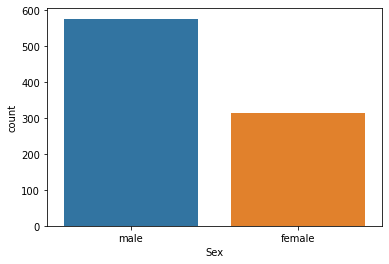

In [11]:
sns.countplot(train.Sex)

In [14]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
train.Age.fillna(train.Age.mean(),inplace=True)

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
train.drop(['PassengerId','Name','Ticket','Cabin','Embarked','SibSp','Parch'],axis=1,inplace=True)

In [21]:
train=pd.get_dummies(train,drop_first=True)

In [22]:
train

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,22.000000,7.2500,1
1,1,1,38.000000,71.2833,0
2,1,3,26.000000,7.9250,0
3,1,1,35.000000,53.1000,0
4,0,3,35.000000,8.0500,1
...,...,...,...,...,...
886,0,2,27.000000,13.0000,1
887,1,1,19.000000,30.0000,0
888,0,3,29.699118,23.4500,0
889,1,1,26.000000,30.0000,1


In [23]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()

In [25]:
f2c=['Age','Fare']
train[f2c]=sts.fit_transform(train[f2c])

In [26]:
train

,Survived,Pclass,Age,Fare,Sex_male
0,0,3,-0.592481,-0.502445,1
1,1,1,0.638789,0.786845,0
2,1,3,-0.284663,-0.488854,0
3,1,1,0.407926,0.420730,0
4,0,3,0.407926,-0.486337,1
...,...,...,...,...,...
886,0,2,-0.207709,-0.386671,1
887,1,1,-0.823344,-0.044381,0
888,0,3,0.000000,-0.176263,0
889,1,1,-0.284663,-0.044381,1


In [27]:
x=train.drop(['Survived'],axis=1)
y=train.Survived

In [30]:
from sklearn.svm import SVC
model=SVC()

In [31]:
model.fit(x,y)

SVC()

In [32]:
test=test.drop(['PassengerId','Name','Ticket','Cabin','Cabin','Embarked','SibSp','Parch'],axis=1)

In [34]:
test.isnull().sum()

Pclass     0
Sex        0
Age       86
Fare       1
dtype: int64

In [35]:
test['Age'].fillna(test['Age'].mean(),inplace=True)
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [36]:
test=pd.get_dummies(test,drop_first=True)

In [38]:
test[f2c]=sts.fit_transform(test[f2c])

In [39]:
test

,Pclass,Age,Fare,Sex_male
0,3,0.334993,-0.498407,1
1,3,1.325530,-0.513274,0
2,2,2.514175,-0.465088,1
3,3,-0.259330,-0.483466,1
4,3,-0.655545,-0.418471,0
...,...,...,...,...
413,3,0.000000,-0.494448,1
414,1,0.691586,1.313753,0
415,3,0.651965,-0.508792,1
416,3,0.000000,-0.494448,1


In [40]:
prediction=model.predict(test)

In [41]:
submission=pd.DataFrame({'PassengerId':gender_sub['PassengerId'],'Survived':prediction})

In [42]:
submission.to_csv('Submission.csv',index=False)